### Variable Description 


ID                  - unique identifier for row

Gender              - Gender of the Customer

Age                 - Age of the Customer (in Years)

Region_Code         - Code of the Region for the customers

Occupation          - Occupation Type for the customer

Channel_Code        - Acquisition Channel Code for the Customer  (Encoded)

Vintage             - Vintage for the Customer (In Months)

Credit_Product      - If the Customer has any active credit product (Home loan,Personal loan, Credit Card etc.)

Avg_Account_Balance - Average Account Balance for the Customer in last 12 Month

Is_Active           - If the Customer is Active in last 3 Months


Is_Lead(Target) - 	
If the Customer is interested for the Credit Card
0 : Customer is not interested
1 : Customer is interested





----------------------------------------------------------------------------------------------------------------------

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
train_df = pd.read_csv(r"E:\conda_workdir\Dataset\av_hack_credit_card\train_s3TEQDk.csv")
test_df = pd.read_csv(r"E:\conda_workdir\Dataset\av_hack_credit_card\test_mSzZ8RL.csv")

In [3]:
train_df.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,NNVBBKZB,Female,73,RG268,Other,X3,43,No,1045696,No,0
1,IDD62UNG,Female,30,RG277,Salaried,X1,32,No,581988,No,0
2,HD3DSEMC,Female,56,RG268,Self_Employed,X3,26,No,1484315,Yes,0
3,BF3NC7KV,Male,34,RG270,Salaried,X1,19,No,470454,No,0
4,TEASRWXV,Female,30,RG282,Salaried,X1,33,No,886787,No,0


In [4]:
train_df.shape

(245725, 11)

In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245725 entries, 0 to 245724
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ID                   245725 non-null  object
 1   Gender               245725 non-null  object
 2   Age                  245725 non-null  int64 
 3   Region_Code          245725 non-null  object
 4   Occupation           245725 non-null  object
 5   Channel_Code         245725 non-null  object
 6   Vintage              245725 non-null  int64 
 7   Credit_Product       216400 non-null  object
 8   Avg_Account_Balance  245725 non-null  int64 
 9   Is_Active            245725 non-null  object
 10  Is_Lead              245725 non-null  int64 
dtypes: int64(4), object(7)
memory usage: 20.6+ MB


In [6]:
train_df['Is_Lead'].value_counts()

0    187437
1     58288
Name: Is_Lead, dtype: int64

Inf. - Dataset doesnt seem to be an imbalanced one

In [7]:
train_df.isnull().sum() / train_df.shape[0] * 100

ID                      0.000000
Gender                  0.000000
Age                     0.000000
Region_Code             0.000000
Occupation              0.000000
Channel_Code            0.000000
Vintage                 0.000000
Credit_Product         11.934073
Avg_Account_Balance     0.000000
Is_Active               0.000000
Is_Lead                 0.000000
dtype: float64

In [9]:
test_df.isnull().sum() / test_df.shape[0] * 100

ID                      0.000000
Gender                  0.000000
Age                     0.000000
Region_Code             0.000000
Occupation              0.000000
Channel_Code            0.000000
Vintage                 0.000000
Credit_Product         11.890383
Avg_Account_Balance     0.000000
Is_Active               0.000000
dtype: float64

The missing values if it doesnt have any pattern to it can be imputed with mode value since only 11 percent of the rows have this missing value. We can also try building model with a dataframe that removes the missing values and another model that uses the complete data and compare if there is any significant improvement to the model perfomance

In [8]:
train_df['Occupation'].value_counts()

Self_Employed    100886
Salaried          71999
Other             70173
Entrepreneur       2667
Name: Occupation, dtype: int64

In [3]:
cred_prod_nan_df = train_df[train_df['Credit_Product'].isnull()]

### EDA

In [11]:
train_df1 = train_df.copy(deep=True)

<AxesSubplot:xlabel='Is_Lead', ylabel='Age'>

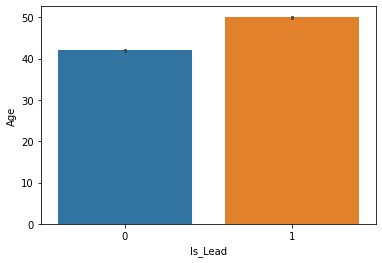

In [12]:
sns.barplot(x='Is_Lead', y='Age', data=train_df1)

In [13]:
train_df1.groupby(['Is_Lead'])['Age'].mean()

Is_Lead
0    41.947662
1    49.993944
Name: Age, dtype: float64

D:\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

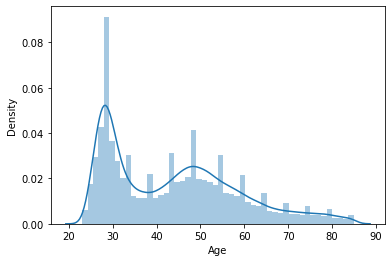

In [18]:
sns.distplot(train_df1['Age'])

D:\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Vintage', ylabel='Density'>

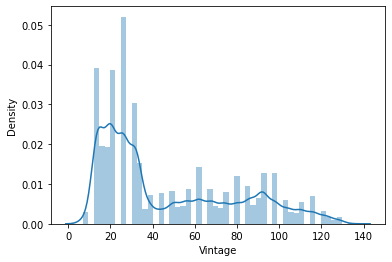

In [179]:
sns.distplot(train_df1['Vintage'])

In [15]:
bins = [20, 30, 40, 50, 60, 70, 80, 90, np.inf]
labels = [2, 3, 4, 5, 6, 7, 8, 9]

train_df1['age_bins'] = pd.cut(x=train_df['Age'], bins=bins, labels=labels)

<AxesSubplot:xlabel='age_bins', ylabel='Is_Lead'>

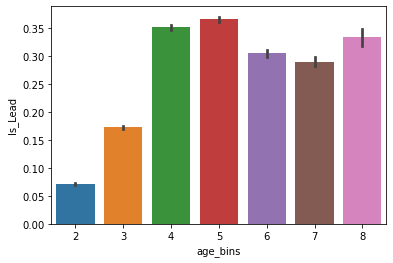

In [68]:
sns.barplot(x='age_bins', y='Is_Lead', data=train_df1)

Is_Lead        0      1     All
age_bins                       
2          63284   4856   68140
3          37006   7723   44729
4          34882  18945   53827
5          28159  16272   44431
6          13636   5995   19631
7           8138   3328   11466
8           2332   1169    3501
All       187437  58288  245725


<AxesSubplot:xlabel='age_bins'>

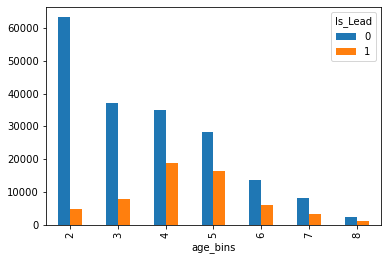

In [16]:
print(pd.crosstab(train_df1['age_bins'],train_df1['Is_Lead'], margins = True))

pd.crosstab(train_df1['age_bins'],train_df1['Is_Lead'], margins = False).plot.bar(stacked=False)

The proportions of the number of people who are a potential leads who would be interested in getting a credit card is highest at 40-60 age range.

If we want to expand the market we should try to bring in more leads from the 20-40 age range because the chances of getting fulfilling the credit is more

Another reason for this is basically most of the customer are from the age of 40-80. So we need more customers belonging to that age demographic

<AxesSubplot:xlabel='Occupation', ylabel='Age'>

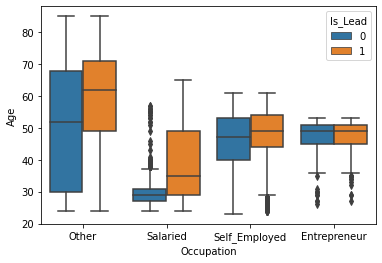

In [17]:
sns.boxplot(x ='Occupation', y ='Age', data = train_df1, hue ='Is_Lead')

We can infer that salaried customers are mostly hard to get a lead from at the age range of 20-30 whereas the the distrbution is more after 30 and before 50.

<AxesSubplot:xlabel='age_bins', ylabel='Avg_Account_Balance'>

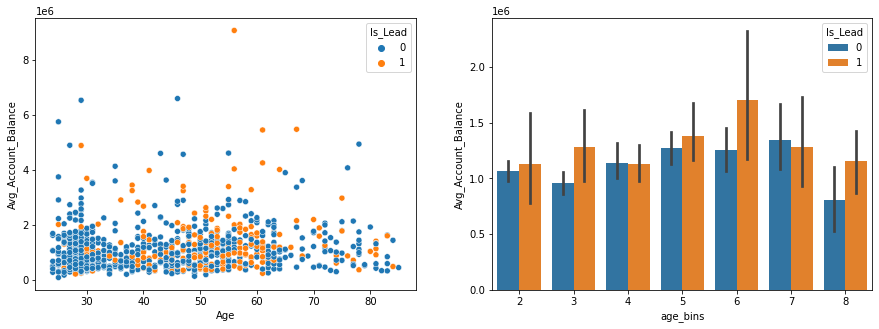

In [63]:
sample_df1 = train_df1.sample(n=1000)

fig, ax = plt.subplots(1,2, figsize=(15, 5))

sns.scatterplot(x='Age', y='Avg_Account_Balance', hue='Is_Lead', data=sample_df1,  ax=ax[0] )
sns.barplot(x='age_bins', y='Avg_Account_Balance', hue='Is_Lead', data=sample_df1 )

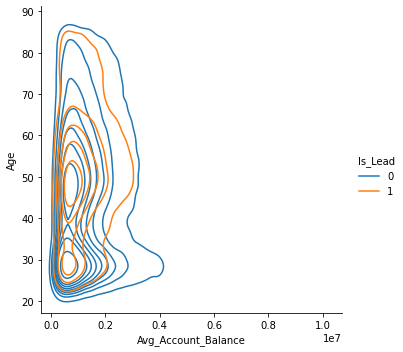

In [39]:
sns.displot(x='Avg_Account_Balance', y='Age', hue='Is_Lead', data=train_df1, kind='kde' )

Mostly People with with average account balance of less than 20L and between the age range of 40 - 60 are potential lead. 

Is_Lead            0      1     All
Channel_Code                       
X1             94236   9482  103718
X2             45519  22207   67726
X3             43493  25219   68712
X4              4189   1380    5569
All           187437  58288  245725


<AxesSubplot:xlabel='Channel_Code'>

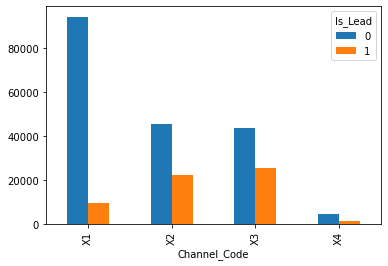

In [42]:
print(pd.crosstab(train_df1['Channel_Code'],train_df1['Is_Lead'], margins = True))

pd.crosstab(train_df1['Channel_Code'],train_df1['Is_Lead'], margins = False).plot.bar(stacked=False)

We can infer, while x1 seems to be the most communicated one the least is x4. But, the channels x2 and x3 have the most conversion rate.

Since, x2 and x3 already have a better conversion rate than others. depending on what the channels are or the cost involved or considering other applicable factors, x1 can be looked into for better conversion rates since it also seems to have a wide density of reach.

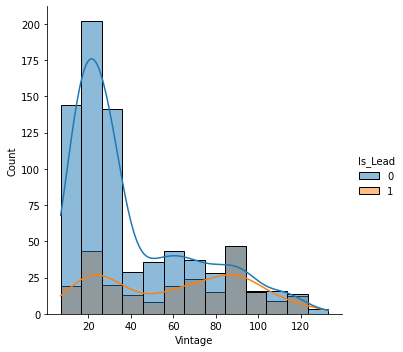

In [55]:
sns.displot(x='Vintage', hue='Is_Lead', data=sample_df1, kde=True )

<AxesSubplot:xlabel='Region_Code'>

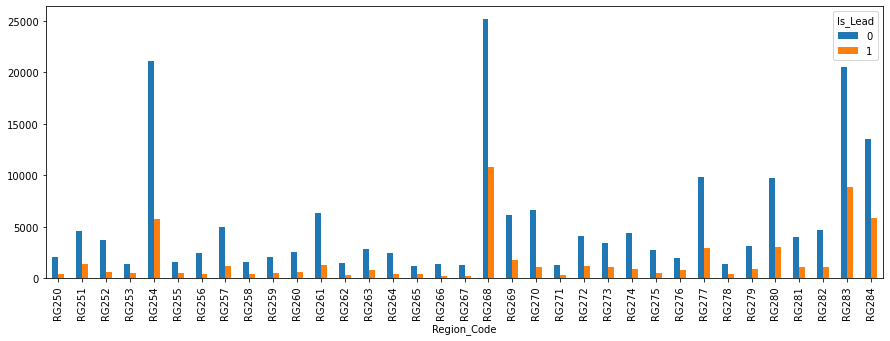

In [102]:

pd.crosstab(train_df1['Region_Code'],train_df1['Is_Lead'], margins = False).sort_values(by='Region_Code').plot.bar(stacked=False, figsize=(15,5))


In [137]:
temp_df = pd.crosstab(train_df1['Region_Code'],train_df1['Is_Lead'], margins = True)
temp_df = temp_df.drop('All')
temp_df['conversion'] = temp_df[1]/temp_df['All'] * 100
temp_df.sort_values(by=['conversion'], ascending=False)

Is_Lead,0,1,All,conversion
Region_Code,,,,
RG283,20531,8885,29416,30.204651
RG284,13504,5816,19320,30.103520
RG268,25161,10773,35934,29.979963
RG276,1996,768,2764,27.785818
RG253,1377,481,1858,25.888052
RG265,1146,400,1546,25.873221
RG273,3428,1069,4497,23.771403
RG280,9766,3009,12775,23.553816
RG255,1549,469,2018,23.240833


The number od customers from some region are significantly more than others. some regions can be ignored which have very less number of customers as the variance that they add to the data will be negligible, This is to counter the high cardinality of the variable.

We cant entirely drop the variable because we can see that some regions have a good conversion rate as oppposed to others which is a pattern.

In [166]:
'''
fig, ax = plt.subplots(1,2,figsize=(15,5))
sns.countplot(df[col], ax=ax[0])
actual_df = pd.DataFrame(df[col].value_counts())
approved_df = pd.DataFrame(df[df[target]==1][col].value_counts())
conv_df = pd.merge(actual_df, approved_df, left_index=True, right_index=True)
conv_df['perc_conversion'] = round((conv_df[col+'_y'] / conv_df[col+'_x'])*100,2)
#conv_df = conv_df.sort_values('perc_conversion', ascending=False)
sns.barplot(x=conv_df.index, y=conv_df.perc_conversion, ax=ax[1])
'''

In [ ]:
# Top Region Characterstics
top_conv_regions = ['RG283', 'RG284', 'RG268', 'RG276', 'RG253']
top_conv_region_df = train_df1.loc[train_df1['Region_Code'].isin(top_conv_regions)]

# Bottom Region Characterstics
bottom_conv_regions = ['RG264', 'RG252', 'RG266', 'RG256', 'RG270']
bottom_conv_region_df = train_df1.loc[train_df1['Region_Code'].isin(bottom_conv_regions)]


### Preprocessing

In [4]:
train_df2 = train_df.copy(deep=True)
test_df2 = test_df.copy(deep = True)

In [5]:
print(train_df2.shape)

train_df2.info()

(245725, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245725 entries, 0 to 245724
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ID                   245725 non-null  object
 1   Gender               245725 non-null  object
 2   Age                  245725 non-null  int64 
 3   Region_Code          245725 non-null  object
 4   Occupation           245725 non-null  object
 5   Channel_Code         245725 non-null  object
 6   Vintage              245725 non-null  int64 
 7   Credit_Product       216400 non-null  object
 8   Avg_Account_Balance  245725 non-null  int64 
 9   Is_Active            245725 non-null  object
 10  Is_Lead              245725 non-null  int64 
dtypes: int64(4), object(7)
memory usage: 20.6+ MB


In [80]:
# cred_prod_nan_df['Gender'].value_counts()
# cred_prod_nan_df['Region_Code'].value_counts()
# cred_prod_nan_df['Occupation'].value_counts()
# sns.displot(cred_prod_nan_df['Age'])
# sns.displot(cred_prod_nan_df['Vintage'])
# sns.displot(cred_prod_nan_df['Avg_Account_Balance'])
# cred_prod_nan_df['Occupation'].value_counts()

In [83]:
train_df2.groupby(['Occupation', 'Is_Lead'])['Is_Lead'].count()

Occupation     Is_Lead
Entrepreneur   0            905
               1           1762
Other          0          52984
               1          17189
Salaried       0          60503
               1          11496
Self_Employed  0          73045
               1          27841
Name: Is_Lead, dtype: int64

Taking only the null valued rows in a dataframe and analyzig with the other variables while also comparing with the previous analysis on these variables using the complete dataframe, there is no significant pattern in the missing values. so we'll be considering as randomly missing.

In [6]:
cred_prod_mode = train_df2['Credit_Product'].mode()[0]

In [7]:
train_df2['Credit_Product'] = train_df2[['Credit_Product']].fillna(value=cred_prod_mode, axis=0)

In [115]:
train_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245725 entries, 0 to 245724
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ID                   245725 non-null  object
 1   Gender               245725 non-null  object
 2   Age                  245725 non-null  int64 
 3   Region_Code          245725 non-null  object
 4   Occupation           245725 non-null  object
 5   Channel_Code         245725 non-null  object
 6   Vintage              245725 non-null  int64 
 7   Credit_Product       245725 non-null  object
 8   Avg_Account_Balance  245725 non-null  int64 
 9   Is_Active            245725 non-null  object
 10  Is_Lead              245725 non-null  int64 
dtypes: int64(4), object(7)
memory usage: 20.6+ MB


#### Handling High Cardinality

##### 1. Encoding with the conversion rate for the corresponding region 

In [8]:
# getting the conversion rates for each region code  

temp_df = pd.crosstab(train_df2['Region_Code'],train_df2['Is_Lead'], margins = True)
temp_df = temp_df.drop('All')
temp_df['conversion'] = temp_df[1]/temp_df['All'] * 100
reg_conv_rate_dict = temp_df['conversion'].to_dict()

In [7]:
reg_conv_rate_dict.values()

dict_values([15.745192307692307, 23.210084033613445, 13.812412505832944, 25.88805166846071, 21.285394932935915, 23.2408325074331, 14.085001756234632, 19.177184068185543, 22.03997949769349, 19.37354988399072, 19.09967845659164, 16.795493252980478, 18.06487695749441, 22.18605912666124, 13.712853562477623, 25.873221216041397, 13.941698352344739, 14.896459585838343, 29.979963265987642, 22.167111789393363, 14.430051813471504, 16.926070038910506, 21.99162223914699, 23.77140315766066, 16.496405599697315, 16.733436055469955, 27.785817655571638, 23.195072508966163, 21.953896816684964, 22.56036217303823, 23.553816046966734, 21.873159238170036, 19.214273460284783, 30.204650530323633, 30.10351966873706])

In [9]:
# encoding with the conversion rate values
train_df2['reg_conv_enc'] = train_df2['Region_Code'].map(reg_conv_rate_dict)
#test_df2['reg_conv_enc'] = test_df2['Region_Code'].map(reg_conv_rate_dict)

##### 2. Weight of Evidence method

In [10]:
# calculating the mean of target for each category. (probability of events or p(1))
temp_df = pd.DataFrame(train_df2.groupby(['Region_Code'])['Is_Lead'].mean())
    
# calculating the non target probability. (probability of non-events or p(0))
temp_df['non-target'] = 1 - temp_df['Is_Lead']
    
# calculating the WOE.
temp_df['ratio'] = np.log(temp_df['Is_Lead'] / temp_df['non-target'])
ratio_mapping_dict = temp_df['ratio'].to_dict()
    
# applying the WOE.
train_df2['reg_woe_enc'] = train_df2['Region_Code'].map(ratio_mapping_dict)
#test_df2['reg_woe_enc'] = test_df2['Region_Code'].map(ratio_mapping_dict)

##### 3. Dropping the high cardinal variable

In [157]:
# in this case we can just not use the columnn while model training

##### 4. Encoding

In [158]:
train_df2.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead,reg_woe_enc,reg_conv_enc
0,NNVBBKZB,Female,73,RG268,Other,X3,43,No,1045696,No,0,-0.848252,29.979963
1,IDD62UNG,Female,30,RG277,Salaried,X1,32,No,581988,No,0,-1.197329,23.195073
2,HD3DSEMC,Female,56,RG268,Self_Employed,X3,26,No,1484315,Yes,0,-0.848252,29.979963
3,BF3NC7KV,Male,34,RG270,Salaried,X1,19,No,470454,No,0,-1.780021,14.430052
4,TEASRWXV,Female,30,RG282,Salaried,X1,33,No,886787,No,0,-1.436147,19.214273


In [159]:
train_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245725 entries, 0 to 245724
Data columns (total 13 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   245725 non-null  object 
 1   Gender               245725 non-null  object 
 2   Age                  245725 non-null  int64  
 3   Region_Code          245725 non-null  object 
 4   Occupation           245725 non-null  object 
 5   Channel_Code         245725 non-null  object 
 6   Vintage              245725 non-null  int64  
 7   Credit_Product       216400 non-null  object 
 8   Avg_Account_Balance  245725 non-null  int64  
 9   Is_Active            245725 non-null  object 
 10  Is_Lead              245725 non-null  int64  
 11  reg_woe_enc          245725 non-null  float64
 12  reg_conv_enc         245725 non-null  float64
dtypes: float64(2), int64(4), object(7)
memory usage: 24.4+ MB


In [11]:
bins = [20, 30, 40, 50, 60, 70, 80, 90, np.inf]
labels = [2, 3, 4, 5, 6, 7, 8, 9]

train_df2['age_bins'] = pd.cut(x=train_df['Age'], bins=bins, labels=labels)

In [12]:
# encoding binary variables

train_df2['Gender'] = train_df2['Gender'].apply(lambda x:1 if x=='Female' else 0)
train_df2['Credit_Product'] = train_df2['Credit_Product'].apply(lambda x:1 if x=='Yes' else 0)
train_df2['Is_Active'] = train_df2['Is_Active'].apply(lambda x:1 if x=='Yes' else 0)

In [13]:
train_df2['age_bins'] = train_df2['age_bins'].astype('int')

##### Model

In [14]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import plot_confusion_matrix, classification_report, roc_auc_score

In [15]:
train_df2.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead,reg_conv_enc,reg_woe_enc,age_bins
0,NNVBBKZB,1,73,RG268,Other,X3,43,0,1045696,0,0,29.979963,-0.848252,7
1,IDD62UNG,1,30,RG277,Salaried,X1,32,0,581988,0,0,23.195073,-1.197329,2
2,HD3DSEMC,1,56,RG268,Self_Employed,X3,26,0,1484315,1,0,29.979963,-0.848252,5
3,BF3NC7KV,0,34,RG270,Salaried,X1,19,0,470454,0,0,14.430052,-1.780021,3
4,TEASRWXV,1,30,RG282,Salaried,X1,33,0,886787,0,0,19.214273,-1.436147,2


In [190]:
X = train_df2.drop(columns=['ID', 'Is_Lead', 'reg_woe_enc', 'reg_conv_enc', 'Age'])
y = train_df2['Is_Lead']

In [191]:
X.head()

,Gender,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,age_bins
0,0,RG268,Other,X3,43,0,1045696,0,7
1,0,RG277,Salaried,X1,32,0,581988,0,2
2,0,RG268,Self_Employed,X3,26,0,1484315,1,5
3,0,RG270,Salaried,X1,19,0,470454,0,3
4,0,RG282,Salaried,X1,33,0,886787,0,2


In [192]:
X = pd.get_dummies(X)

##### Logistic Regression

In [201]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42, stratify=y)

In [203]:
# Log Normal transformation for account balance

X_train['Avg_Account_Balance'] = np.log(X_train['Avg_Account_Balance'])
X_test['Avg_Account_Balance'] = np.log(X_test['Avg_Account_Balance'])

<ipython-input-203-cbfe89d1d1dc>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['Avg_Account_Balance'] = np.log(X_train['Avg_Account_Balance'])
<ipython-input-203-cbfe89d1d1dc>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['Avg_Account_Balance'] = np.log(X_test['Avg_Account_Balance'])


In [207]:
# Logistics Regression

logit_model = LogisticRegression(class_weight='balanced', random_state=204)
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=204)
best_logit = GridSearchCV(logit_model, param_grid={'max_iter':[100,300,500,1000], 'C':[0.001, 0.01, 0.1, 1, 10, 100, 1000]}, 
                          scoring='roc_auc', cv=kfold, n_jobs=-1)

In [208]:
best_logit.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=204, shuffle=True),
             estimator=LogisticRegression(class_weight='balanced',
                                          random_state=204),
             n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'max_iter': [100, 300, 500, 1000]},
             scoring='roc_auc')

In [209]:
best_logit.best_params_

{'C': 1000, 'max_iter': 1000}

In [211]:
y_pred_logit = best_logit.best_estimator_.predict(X_test)

              precision    recall  f1-score   support

           0       0.88      0.59      0.71     56231
           1       0.36      0.73      0.48     17487

    accuracy                           0.63     73718
   macro avg       0.62      0.66      0.60     73718
weighted avg       0.76      0.63      0.66     73718

roc auc score:  0.6645172913095718


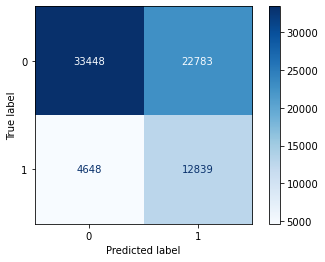

In [214]:
print(plot_confusion_matrix(best_logit.best_estimator_, X_test, y_test, cmap=plt.cm.Blues))
print(classification_report(y_test, y_pred_logit))
print("roc auc score: ", roc_auc_score(y_test, y_pred_logit))
     

###### Logistic Regression with the woe encoding for the region 

In [17]:

X = train_df2.drop(columns=['ID', 'Is_Lead', 'reg_conv_enc', 'Age', 'Region_Code'])
y = train_df2['Is_Lead']

In [18]:
X = pd.get_dummies(X)

In [264]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42, stratify=y)

In [265]:
# Log Normal transformation for account balance

X_train['Avg_Account_Balance'] = np.log(X_train['Avg_Account_Balance'])
X_test['Avg_Account_Balance'] = np.log(X_test['Avg_Account_Balance'])

<ipython-input-265-cbfe89d1d1dc>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['Avg_Account_Balance'] = np.log(X_train['Avg_Account_Balance'])
<ipython-input-265-cbfe89d1d1dc>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['Avg_Account_Balance'] = np.log(X_test['Avg_Account_Balance'])


In [266]:
# Logistics Regression

logit_model_2 = LogisticRegression(class_weight='balanced', random_state=204)
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=204)
best_logit_2 = GridSearchCV(logit_model_2, param_grid={'max_iter':[100,300,500,1000], 'C':[0.1, 1, 10, 100, 1000]}, 
                          scoring='roc_auc', cv=kfold, n_jobs=-1)

In [272]:
best_logit_2.fit(X_train, y_train)
print(best_logit_2.best_params_)
final_best_logit_2 = best_logit_2.best_estimator_

{'C': 1000, 'max_iter': 300}


              precision    recall  f1-score   support

           0       0.88      0.59      0.71     56231
           1       0.36      0.73      0.48     17487

    accuracy                           0.63     73718
   macro avg       0.62      0.66      0.60     73718
weighted avg       0.76      0.63      0.66     73718

roc auc score:  0.6633534708889913


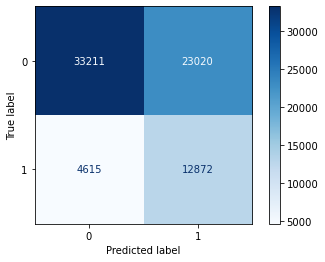

In [273]:
y_pred_logit_2 = final_best_logit_2.predict(X_test)

print(plot_confusion_matrix(final_best_logit_2, X_test, y_test, cmap=plt.cm.Blues))
print(classification_report(y_test, y_pred_logit))
print("roc auc score: ", roc_auc_score(y_test, y_pred_logit_2))
     

##### Naive Bayes

In [225]:
for col in ['Region_Code', 'Occupation', 'Channel_Code', 'Credit_Product', 'Is_Active', 'age_bins']:
    X_nb[col] = X_nb[col].astype('category')

In [230]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42, stratify=y)

In [231]:
X_train_transform = X_train.copy(deep=True)
X_test_transform = X_test.copy(deep=True)

X_train_transform['Avg_Account_Balance'] = np.log(X_train_transform['Avg_Account_Balance'])
X_test_transform['Avg_Account_Balance'] = np.log(X_test_transform['Avg_Account_Balance'])

In [232]:
naive_model = GaussianNB()
naive_model.fit(X_train_transform, y_train)

GaussianNB()

In [235]:
y_pred_nb = naive_model.predict(X_test_transform)

              precision    recall  f1-score   support

           0       0.88      0.59      0.71     56231
           1       0.36      0.73      0.48     17487

    accuracy                           0.63     73718
   macro avg       0.62      0.66      0.60     73718
weighted avg       0.76      0.63      0.66     73718

roc auc score:  0.6414802266875153


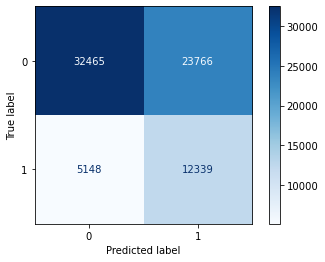

In [236]:
print(plot_confusion_matrix(naive_model, X_test_transform, y_test, cmap=plt.cm.Blues))
print(classification_report(y_test, y_pred_logit))
print("roc auc score: ", roc_auc_score(y_test, y_pred_nb))
     

##### Random Forest

In [240]:
for col in ['Region_Code', 'Occupation', 'Channel_Code', 'Credit_Product', 'Is_Active', 'age_bins']:
    X_rf[col] = X_rf[col].astype('category')

In [246]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42, stratify=y)

In [248]:
for estimator in range(50,1550,50):
    rf_model = RandomForestClassifier(n_estimators=estimator, random_state=204)
    kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=204)
    print("Estimator " + str(estimator)+ ": " + 
          str(np.mean(cross_val_score(rf_model, X_train, y_train, cv=kfold, scoring='roc_auc'))))

Estimator 50: 0.7330332851816582
Estimator 100: 0.7359958465553622
Estimator 150: 0.7368232698796093
Estimator 200: 0.7373324874262372
Estimator 250: 0.7377539596407279
Estimator 300: 0.7380225348251459
Estimator 350: 0.7380455649162463
Estimator 400: 0.738117256985491
Estimator 450: 0.73815416632058
Estimator 500: 0.7382423084470612
Estimator 550: 0.7383392145420682
Estimator 600: 0.7384015282388601
Estimator 650: 0.7384516499178815
Estimator 700: 0.7385187179062844
Estimator 750: 0.7385626179924618
Estimator 800: 0.7386038595596335
Estimator 850: 0.7385994054030111
Estimator 900: 0.7386230487918237
Estimator 950: 0.7386242215587807
Estimator 1000: 0.7386309266940005
Estimator 1050: 0.7386653628679707


KeyboardInterrupt: 

The above kernel was interrupted because there is no significant increase in performance with increase in the number of estimators but with the amount of trade off with computation that was happening, Going ahead with 350 estimators

In [250]:
rfc1 = RandomForestClassifier(n_estimators=350, class_weight={1:1, 0:3})
rfc_param_grid = {
    'max_depth': [7, 16, 20, 32], 
    'max_features':['sqrt','log2',None]}

best_rfc = GridSearchCV(rfc1, param_grid=rfc_param_grid, cv=kfold, scoring='roc_auc', n_jobs=-1)

In [251]:
best_rfc.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=204, shuffle=True),
             estimator=RandomForestClassifier(class_weight={0: 3, 1: 1},
                                              n_estimators=350),
             n_jobs=-1,
             param_grid={'max_depth': [7, 16, 20, 32],
                         'max_features': ['sqrt', 'log2', None]},
             scoring='roc_auc')

In [252]:
print(best_rfc.best_params_)
rfc2 = best_rfc.best_estimator_

{'max_depth': 7, 'max_features': None}


In [255]:
y_pred_rfc = rfc2.predict(X_test)

              precision    recall  f1-score   support

           0       0.78      1.00      0.88     56231
           1       0.96      0.10      0.17     17487

    accuracy                           0.78     73718
   macro avg       0.87      0.55      0.52     73718
weighted avg       0.82      0.78      0.71     73718

roc auc score:  0.5471470252727045


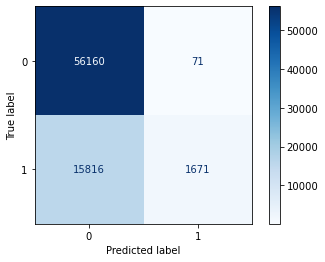

In [256]:
print(plot_confusion_matrix(rfc2, X_test, y_test, cmap=plt.cm.Blues))
print(classification_report(y_test, y_pred_rfc))
print("roc auc score: ", roc_auc_score(y_test, y_pred_rfc))

              precision    recall  f1-score   support

           0       0.78      1.00      0.88     56231
           1       0.92      0.10      0.18     17487

    accuracy                           0.78     73718
   macro avg       0.85      0.55      0.53     73718
weighted avg       0.81      0.78      0.71     73718

roc auc score:  0.5497632323524028


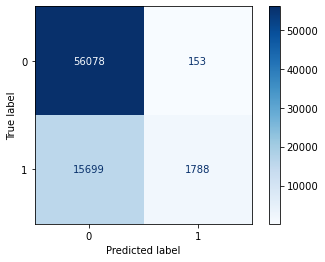

In [260]:
rfc_3 = RandomForestClassifier(n_estimators=350, max_depth=7)
rfc_3.fit(X_train, y_train)    
y_pred_rfc3 = rfc_3.predict(X_test)

print(plot_confusion_matrix(rfc_3, X_test, y_test, cmap=plt.cm.Blues))
print(classification_report(y_test, y_pred_rfc3))
print("roc auc score: ", roc_auc_score(y_test, y_pred_rfc3))

##### XG Boost

In [19]:
X.head()

,Gender,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,reg_woe_enc,age_bins,Occupation_Entrepreneur,Occupation_Other,Occupation_Salaried,Occupation_Self_Employed,Channel_Code_X1,Channel_Code_X2,Channel_Code_X3,Channel_Code_X4
0,1,43,0,1045696,0,-0.848252,7,0,1,0,0,0,0,1,0
1,1,32,0,581988,0,-1.197329,2,0,0,1,0,1,0,0,0
2,1,26,0,1484315,1,-0.848252,5,0,0,0,1,0,0,1,0
3,0,19,0,470454,0,-1.780021,3,0,0,1,0,1,0,0,0
4,1,33,0,886787,0,-1.436147,2,0,0,1,0,1,0,0,0


In [32]:
X1 = X.drop(columns=['reg_woe_enc'])
#X2 = X.drop(columns=['Region_Code'])

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42, stratify=y)

In [24]:
xgb1 = XGBClassifier(n_estimator=250, n_jobs=-1, n_threads=-1)
xgb_param_grid={
 "learning_rate"    : [0.10, 0.5, 1.0 ] ,
 "max_depth"        : [8, 16, 32, 64],
 "gamma"            : [ 0.5, 2, 5, 8],
 "colsample_bytree" : [ 0.5 , 0.7, 1.0 ],
    }
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=204)

In [25]:
best_xgb = GridSearchCV(xgb1, param_grid=xgb_param_grid, cv=kfold, scoring='roc_auc', n_jobs=-1)

In [34]:
best_xgb.fit(X_train, y_train)

D:\Anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py:688: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
D:\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:15:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "n_estimator", "n_threads" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[16:15:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=204, shuffle=True),
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missi...
                                     n_estimator=250, n_estimators=100,
                                     n_jobs=-1, n_threads=-1,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     

In [35]:
print(best_xgb.best_params_)
xgb2 = best_xgb.best_estimator_

{'colsample_bytree': 0.7, 'gamma': 8, 'learning_rate': 0.1, 'max_depth': 8}


[16:15:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "n_estimator", "n_threads" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[16:15:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


              precision    recall  f1-score   support

           0       0.81      0.96      0.88     56231
           1       0.66      0.26      0.38     17487

    accuracy                           0.79     73718
   macro avg       0.73      0.61      0.63     73718
weighted avg       0.77      0.79      0.76     73718

roc auc score:  0.6105370458207914


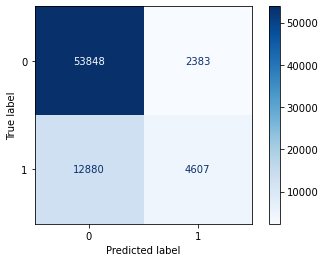

In [36]:
xgb2.fit(X_train, y_train)    
y_pred_xgb = xgb2.predict(X_test)

print(plot_confusion_matrix(xgb2, X_test, y_test, cmap=plt.cm.Blues))
print(classification_report(y_test, y_pred_xgb))
print("roc auc score: ", roc_auc_score(y_test, y_pred_xgb))

In [ ]:
#####################################################################################################################################################

In [67]:
train_df.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,NNVBBKZB,Female,73,RG268,Other,X3,43,No,1045696,No,0
1,IDD62UNG,Female,30,RG277,Salaried,X1,32,No,581988,No,0
2,HD3DSEMC,Female,56,RG268,Self_Employed,X3,26,No,1484315,Yes,0
3,BF3NC7KV,Male,34,RG270,Salaried,X1,19,No,470454,No,0
4,TEASRWXV,Female,30,RG282,Salaried,X1,33,No,886787,No,0


In [69]:
cat_train_df = train_df.copy(deep=True)

In [89]:
cat_train_df['Credit_Product'].fillna(value='No', inplace=True)

In [71]:
cat_train_df['age_bins'] = pd.cut(x=train_df['Age'], bins=bins, labels=labels)

In [72]:
cat_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245725 entries, 0 to 245724
Data columns (total 12 columns):
 #   Column               Non-Null Count   Dtype   
---  ------               --------------   -----   
 0   ID                   245725 non-null  object  
 1   Gender               245725 non-null  object  
 2   Age                  245725 non-null  int64   
 3   Region_Code          245725 non-null  object  
 4   Occupation           245725 non-null  object  
 5   Channel_Code         245725 non-null  object  
 6   Vintage              245725 non-null  int64   
 7   Credit_Product       216400 non-null  object  
 8   Avg_Account_Balance  245725 non-null  int64   
 9   Is_Active            245725 non-null  object  
 10  Is_Lead              245725 non-null  int64   
 11  age_bins             245725 non-null  category
dtypes: category(1), int64(4), object(7)
memory usage: 20.9+ MB


In [40]:
to_cat = ['age_bins', 'Is_Lead', 'Is_Active', 'Credit_Product', 'Gender', 'vintage_bins']
for col in to_cat:
    cat_train_df[col] = cat_train_df[col].astype('object')
    

In [56]:
cat_train_df['Avg_Account_Balance'] = cat_train_df['Avg_Account_Balance'].astype(np.float32)

In [19]:
from catboost import CatBoostClassifier

In [117]:
#Creating a training set for modeling and validation set to check model performance
X = cat_train_df.drop(['Is_Lead', 'Age', 'ID', 'Gender'], axis=1)
y = cat_train_df.Is_Lead

from sklearn.model_selection import train_test_split
X_train, X_validation, y_train, y_validation = train_test_split(X, y, train_size=0.7, random_state=42)


In [118]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 172007 entries, 138403 to 121958
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype   
---  ------               --------------   -----   
 0   Region_Code          172007 non-null  object  
 1   Occupation           172007 non-null  object  
 2   Channel_Code         172007 non-null  object  
 3   Vintage              172007 non-null  int64   
 4   Credit_Product       172007 non-null  object  
 5   Avg_Account_Balance  172007 non-null  int64   
 6   Is_Active            172007 non-null  object  
 7   age_bins             172007 non-null  category
dtypes: category(1), int64(2), object(5)
memory usage: 10.7+ MB


In [92]:
X_validation.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73718 entries, 241356 to 190996
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   Gender               73718 non-null  object  
 1   Region_Code          73718 non-null  object  
 2   Occupation           73718 non-null  object  
 3   Channel_Code         73718 non-null  object  
 4   Vintage              73718 non-null  int64   
 5   Credit_Product       73718 non-null  object  
 6   Avg_Account_Balance  73718 non-null  int64   
 7   Is_Active            73718 non-null  object  
 8   age_bins             73718 non-null  category
dtypes: category(1), int64(2), object(6)
memory usage: 5.1+ MB


In [119]:
categorical_features_indices = np.where(X.dtypes != np.float32)[0]

In [120]:
categorical_features_indices

array([0, 1, 2, 3, 4, 5, 6, 7], dtype=int64)

In [121]:
X_train.head()

,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,age_bins
138403,RG275,Salaried,X3,20,No,1726840,No,2
117015,RG279,Self_Employed,X1,37,No,303187,No,5
322,RG261,Salaried,X1,13,No,886813,No,3
64910,RG268,Self_Employed,X3,92,Yes,1227416,Yes,4
39919,RG274,Other,X1,19,No,717553,No,3


In [122]:
cbc=CatBoostClassifier(n_estimators=100, depth=6, learning_rate=0.2, eval_metric='AUC', loss_function='Logloss', scale_pos_weight = 2.5)
cbc.fit(X_train, y_train,cat_features=categorical_features_indices,eval_set=(X_validation, y_validation),plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	test: 0.7531459	best: 0.7531459 (0)	total: 412ms	remaining: 40.8s
1:	test: 0.7552714	best: 0.7552714 (1)	total: 580ms	remaining: 28.4s
2:	test: 0.7616193	best: 0.7616193 (2)	total: 703ms	remaining: 22.7s
3:	test: 0.7683778	best: 0.7683778 (3)	total: 892ms	remaining: 21.4s
4:	test: 0.7691685	best: 0.7691685 (4)	total: 1.01s	remaining: 19.1s
5:	test: 0.7734184	best: 0.7734184 (5)	total: 1.13s	remaining: 17.6s
6:	test: 0.7736690	best: 0.7736690 (6)	total: 1.22s	remaining: 16.2s
7:	test: 0.7753169	best: 0.7753169 (7)	total: 1.33s	remaining: 15.3s
8:	test: 0.7768658	best: 0.7768658 (8)	total: 1.43s	remaining: 14.4s
9:	test: 0.7774654	best: 0.7774654 (9)	total: 1.55s	remaining: 14s
10:	test: 0.7786255	best: 0.7786255 (10)	total: 1.69s	remaining: 13.7s
11:	test: 0.7788561	best: 0.7788561 (11)	total: 1.78s	remaining: 13s
12:	test: 0.7791084	best: 0.7791084 (12)	total: 1.89s	remaining: 12.7s
13:	test: 0.7799422	best: 0.7799422 (13)	total: 1.98s	remaining: 12.1s
14:	test: 0.7802914	best: 0.78

              precision    recall  f1-score   support

           0       0.88      0.75      0.81     56260
           1       0.45      0.68      0.54     17458

    accuracy                           0.73     73718
   macro avg       0.67      0.71      0.68     73718
weighted avg       0.78      0.73      0.75     73718

roc auc score:  0.7128129897615839


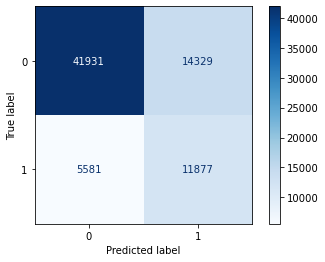

In [123]:
y_pred_cb = cbc.predict(X_validation)

print(plot_confusion_matrix(cbc, X_validation, y_validation, cmap=plt.cm.Blues))
print(classification_report(y_validation, y_pred_cb))
print("roc auc score: ", roc_auc_score(y_validation, y_pred_cb))

In [116]:
pd.crosstab(train_df['Gender'],train_df['Is_Lead'], margins = True)

Is_Lead,0,1,All
Gender,,,
Female,88823,22705,111528
Male,98614,35583,134197
All,187437,58288,245725
